In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [2]:
#1. Import the data set and perform data preprocessing with StandardScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X = wine.data
y = wine.target
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(178, 13)


In [3]:
#2. Import PCA module and process data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_pca.shape)

(178, 2)


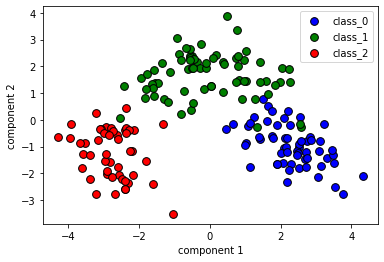

In [4]:
#3. Visualize with PCA-processed datasets
X0 = X_pca[wine.target==0]
X1 = X_pca[wine.target==1]
X2 = X_pca[wine.target==2]
plt.scatter(X0[:, 0],X0[:, 1], c = 'b',s = 60,edgecolor = 'k')
plt.scatter(X1[:, 0],X1[:, 1], c = 'g',s = 60,edgecolor = 'k')
plt.scatter(X2[:, 0],X2[:, 1], c = 'r',s = 60,edgecolor = 'k')
plt.legend(wine.target_names,loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

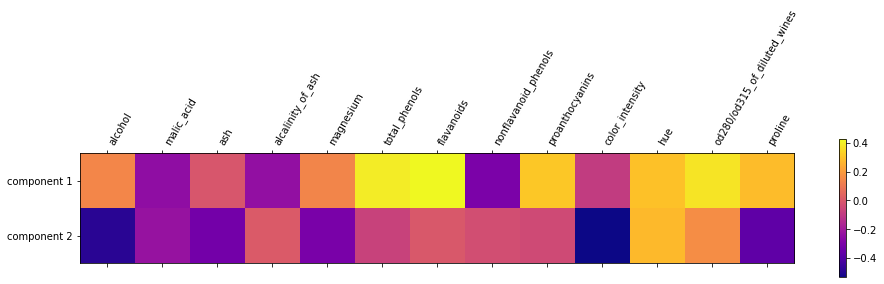

In [5]:
#4. Relationship between original features and PCA principal components
plt.matshow(pca.components_,cmap = 'plasma')
plt.yticks([0,1],['component 1','component 2'])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),wine.feature_names,rotation = 60,ha = 'left')
plt.show()

In [7]:
import pandas as pd
sample = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
sample.columns = ['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline','target']
sample.head()
sample.to_csv(r"C:\Users\60250\Desktop\big data viturlisation\Project\wine.csv")